In [0]:
!unzip renfe.csv.zip

Archive:  renfe.csv.zip
  inflating: renfe.csv               


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
 data = pd.read_csv("renfe.csv",index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
data.shape

(2579771, 9)

In [0]:
data.columns

Index(['insert_date', 'origin', 'destination', 'start_date', 'end_date',
       'train_type', 'price', 'train_class', 'fare'],
      dtype='object')

In [0]:
data.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

In [0]:
data[:10]

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo
5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,Turista,Promo
6,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:45:00,2019-05-29 12:27:00,INTERCITY,62.20,Turista,Flexible
7,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 10:00:00,2019-05-29 12:32:00,AVE,47.30,Turista,Promo
8,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 11:00:00,2019-05-29 13:32:00,AVE,53.40,Turista,Promo
9,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 11:05:00,2019-05-29 13:41:00,ALVIA,NaN,Turista,Promo


In [0]:
data.isna().sum()

insert_date         0
origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          310681
train_class      9664
fare             9664
dtype: int64

In [0]:
data.price.max(), data.price.min(), data.price.mean()

(214.2, 15.45, 63.38550341776677)

In [0]:
#Change these columns into datetime type.
dates = ["insert_date","start_date","end_date"]
for i in dates:
  data[i] = pd.to_datetime(data[i])     

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579771 entries, 0 to 2579770
Data columns (total 9 columns):
insert_date    datetime64[ns]
origin         object
destination    object
start_date     datetime64[ns]
end_date       datetime64[ns]
train_type     object
price          float64
train_class    object
fare           object
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 196.8+ MB


In [0]:
data['train_class'].value_counts()

Turista               1950303
Preferente             256082
Turista Plus           192908
Turista con enlace     169549
Cama Turista             1051
Cama G. Clase             214
Name: train_class, dtype: int64

In [0]:
data['fare'].value_counts()

Promo                  1733423
Flexible                582743
Adulto ida              179844
Promo +                  73778
Individual-Flexible        214
Mesa                        99
Grupos Ida                   6
Name: fare, dtype: int64

In [0]:
#Fill the missing value in fare column be the mode value.
data['fare'].fillna(data['fare'].mode()[0],inplace=True)

In [0]:
data['fare'].value_counts()

Promo                  1743087
Flexible                582743
Adulto ida              179844
Promo +                  73778
Individual-Flexible        214
Mesa                        99
Grupos Ida                   6
Name: fare, dtype: int64

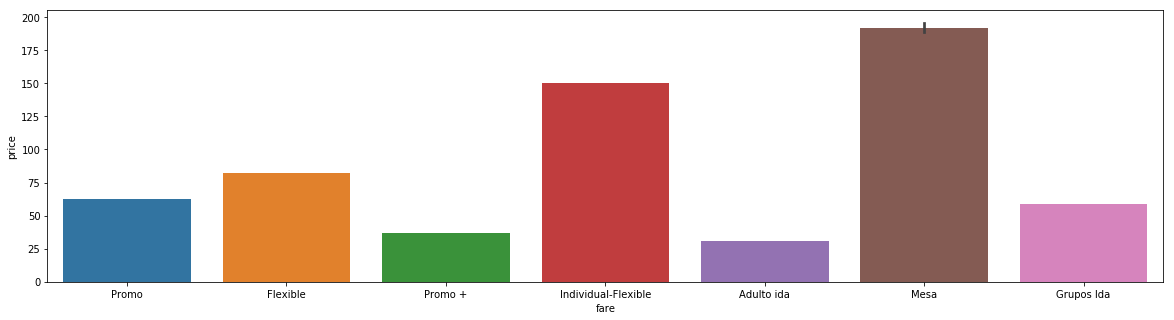

In [0]:
fig, ax = plt.subplots(figsize=[20,5])
sns.barplot(x="fare", y="price", data=data, ax = ax)

Majority of people are taking Promo fare because of the reasonable price.. 

In [0]:
#Fill the train_class missing values with the mode value
data['train_class'].fillna(data['train_class'].mode()[0],inplace=True)

In [0]:
data['train_class'].value_counts()

Turista               1959967
Preferente             256082
Turista Plus           192908
Turista con enlace     169549
Cama Turista             1051
Cama G. Clase             214
Name: train_class, dtype: int64

In [0]:
#Fill the missing values in price column based on 'fare' column 
data.loc[data.price.isnull(), 'price'] = data.groupby(['fare']).price.transform('mean')

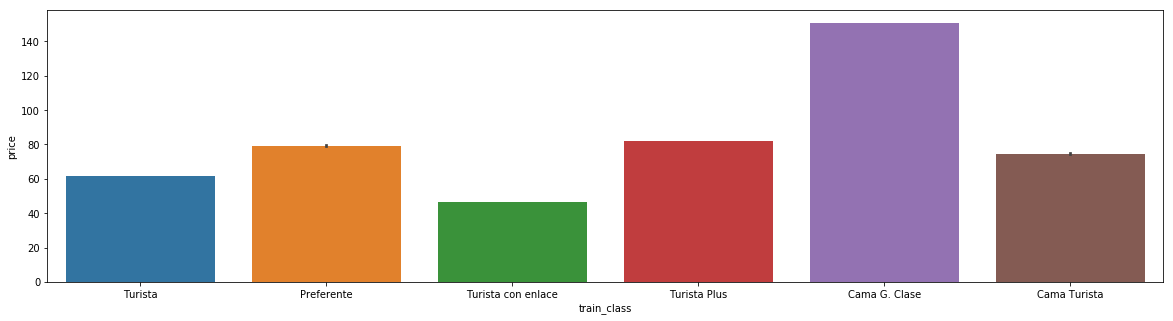

In [0]:
fig, ax = plt.subplots(figsize=[20,5])
sns.barplot(x="train_class", y="price", data=data, ax = ax)

Majority of people travel in Turista class because of the reasonable price.

In [0]:
#Check for the missing values again.
data.isnull().sum()

insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

In [0]:
data["origin"].value_counts()


MADRID        1359423
BARCELONA      405621
SEVILLA        398445
VALENCIA       323086
PONFERRADA      93196
Name: origin, dtype: int64

In [0]:
data["destination"].value_counts()

MADRID        1220348
BARCELONA      480074
SEVILLA        413155
VALENCIA       399679
PONFERRADA      66515
Name: destination, dtype: int64

In [0]:
data["start_date"].dt.month.value_counts()

5    1850391
4     495071
6     218707
7      15602
Name: start_date, dtype: int64

So the 5th Month is the busiest month. 

Now let's see which are the busiest hour.

In [0]:
data["start_date"].dt.hour.value_counts()

17    199205
9     195846
16    195051
14    189059
6     183027
7     175759
8     172965
19    166797
12    161145
15    158843
18    147939
11    147447
20    127920
13    114972
21    107072
10    102320
5      15053
22     10017
2       9334
Name: start_date, dtype: int64